# CSC578 Diana Bursac Final Project

In [2]:
# https://www.kaggle.com/selfishgene/filtering-and-auto-correlation-tutorial


import pandas as pd
import numpy as np




In [3]:
import pandas as pd

train_climate = pd.read_csv("train_data.csv")

In [4]:
train_climate.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
train_climate.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000,52566.000000
mean,988.723002,9.172795,283.254265,4.779049,76.444300,13.357483,9.458133,3.899249,5.977212,9.568031,1216.718989,2.142170,3.539017,173.689628
std,8.190684,8.533081,8.605048,6.922701,16.430164,7.572008,4.201679,4.723265,2.666892,4.253017,40.439912,1.530832,2.313246,87.251111
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,0.000000,0.000000,0.000000
25%,983.750000,3.110000,277.242500,0.130000,65.810000,7.640000,6.170000,0.810000,3.890000,6.240000,1188.082500,1.010000,1.800000,120.800000
50%,989.140000,9.310000,283.430000,5.200000,79.700000,11.740000,8.850000,2.090000,5.595000,8.965000,1213.440000,1.790000,3.000000,197.100000
75%,994.070000,15.280000,289.370000,10.030000,89.800000,17.390000,12.320000,5.130000,7.780000,12.450000,1243.050000,2.880000,4.750000,233.800000
max,1012.740000,35.480000,309.690000,22.940000,100.000000,57.800000,28.040000,41.710000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


In [6]:
# No missing values

train_climate.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [7]:
# here data time is str

train_climate.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [8]:
len(train_climate)

52566

In [9]:
train_climate_vis = pd.read_csv("train_data.csv", parse_dates=['Date Time'], index_col='Date Time')


In [10]:
train_climate_vis.values

array([[  9.96500000e+02,  -8.05000000e+00,   2.65380000e+02, ...,
          2.10000000e-01,   6.30000000e-01,   1.92700000e+02],
       [  9.96620000e+02,  -8.88000000e+00,   2.64540000e+02, ...,
          2.50000000e-01,   6.30000000e-01,   1.90300000e+02],
       [  9.96840000e+02,  -8.81000000e+00,   2.64590000e+02, ...,
          1.80000000e-01,   6.30000000e-01,   1.67200000e+02],
       ..., 
       [  1.00669000e+03,   1.96000000e+00,   2.74600000e+02, ...,
          6.70000000e-01,   1.56000000e+00,   1.45300000e+02],
       [  1.00692000e+03,   1.94000000e+00,   2.74560000e+02, ...,
          7.10000000e-01,   1.80000000e+00,   1.29600000e+02],
       [  1.00711000e+03,   2.18000000e+00,   2.74780000e+02, ...,
          3.50000000e-01,   8.60000000e-01,   1.40800000e+02]])

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(train_climate_vis["T (degC)"].values, autolag='AIC')

In [12]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.9483836588149055
p-value: 3.174344622593456e-12
Critial Values:
   1%, -3.4304745333476085
Critial Values:
   5%, -2.8615950412401157
Critial Values:
   10%, -2.5667992966216273


In [13]:
#print('ADF Statistic: {} '.format(result[0]))

#print('p-value:{}'.format(result[1]))


for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.4304745333476085
Critial Values:
   5%, -2.8615950412401157
Critial Values:
   10%, -2.5667992966216273


In [14]:
train_climate_vis.reset_index(inplace=True)

In [15]:
# Prepare data
train_climate_vis['year'] = [d.year for d in train_climate_vis['Date Time']]
train_climate_vis['month'] = [d.month for d in train_climate_vis['Date Time']]

In [15]:
years = train_climate_vis['year'].unique()

In [16]:
train_climate_vis['time_hour'] = train_climate_vis["Date Time"].apply(lambda x: x.hour)

In [17]:
range(5)

range(0, 5)

In [18]:
train_climate.index

RangeIndex(start=0, stop=52566, step=1)

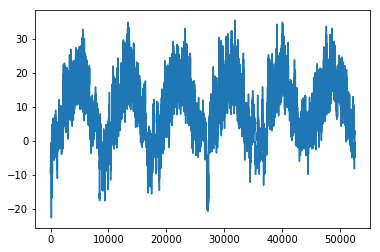

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(train_climate_vis["T (degC)"])

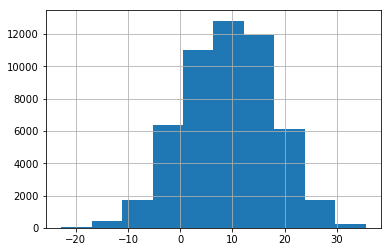

In [20]:
train_climate_vis["T (degC)"].hist()

NameError: name 'pyplot' is not defined

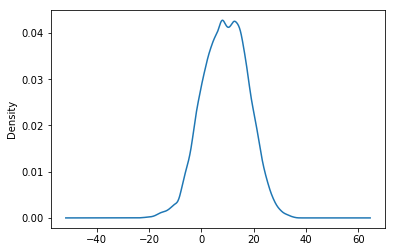

In [21]:
train_climate_vis["T (degC)"].plot(kind='kde')
pyplot.show()

In [ ]:
# https://machinelearningmastery.com/time-series-data-visualization-with-python/
from pandas.plotting import lag_plot
lag_plot(train_climate_vis["T (degC)"])
pyplot.show()

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12,5), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:13]):
    lag_plot(train_climate_vis["T (degC)"], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

In [ ]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(train_climate_vis["T (degC)"])
pyplot.show()

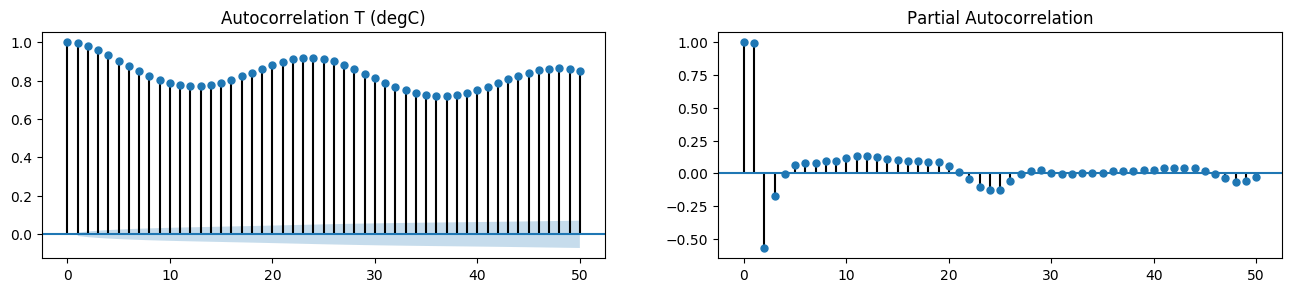

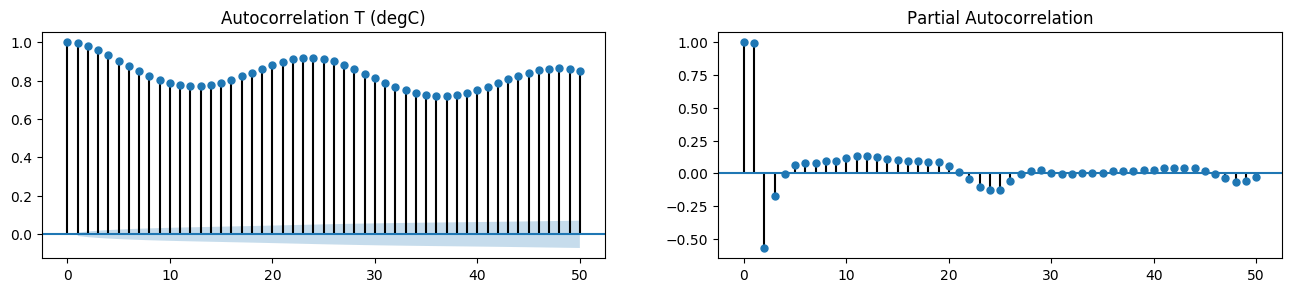

In [41]:
import matplotlib.pyplot as plt
% matplotlib inline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_climate_vis["T (degC)"].tolist(), lags=50, ax=axes[0], title='Autocorrelation T (degC)')
plot_pacf(train_climate_vis["T (degC)"].tolist(), lags=50, ax=axes[1])


This correlation gradually decreases up to 12 hour difference, that corresponds to the switch from day to night, and then contiues to gradualy increase and ocilate in the same way.
For the series  we can see that ACF of lag1 equals 1. The ACF values for the first 24 lags are in general very high. This means that the time series value is the most affected by the time series values 1 time unit in the past and will tend to be “close” to this value. In addition since the ACF values are very high the time series value is also affected by time series value 2,3,4  up to 24 legs upart and even more. Since we get a large positive autocorrelation at lag one this means that consecutive values agree with each other - temp value at a given hour is very similar to the next hour (either before or after)- which implies that oscillations are low.

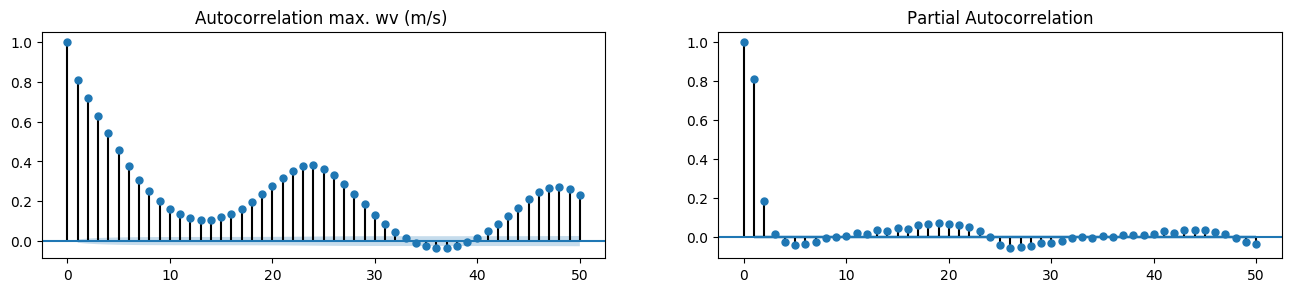

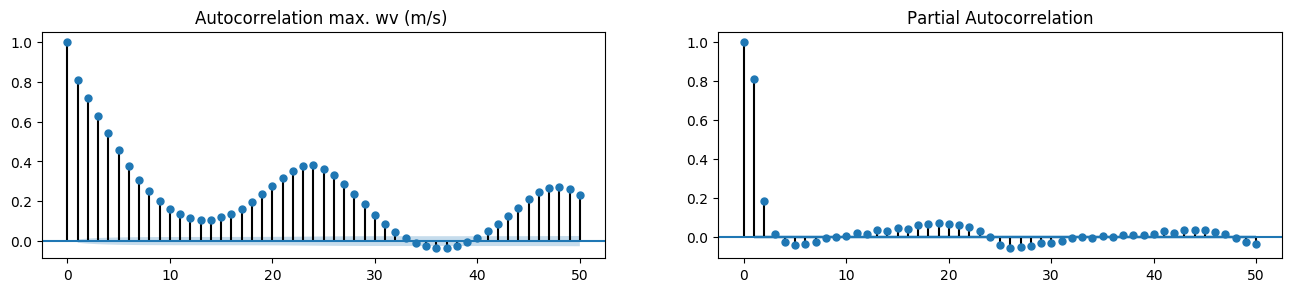

In [17]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_climate_vis["max. wv (m/s)"].tolist(), lags=50, ax=axes[0], title = "Autocorrelation max. wv (m/s) ")
plt.title("Autocorrelation max wv (m/s)")
plot_pacf(train_climate_vis["max. wv (m/s)"].tolist(), lags=50, ax=axes[1])

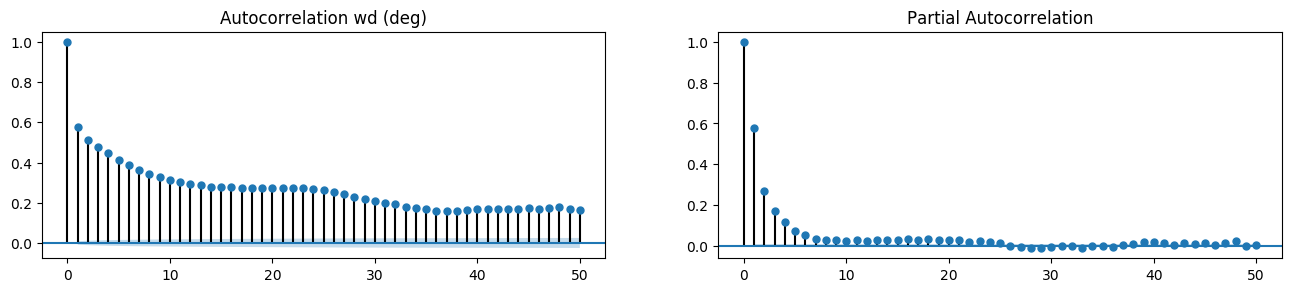

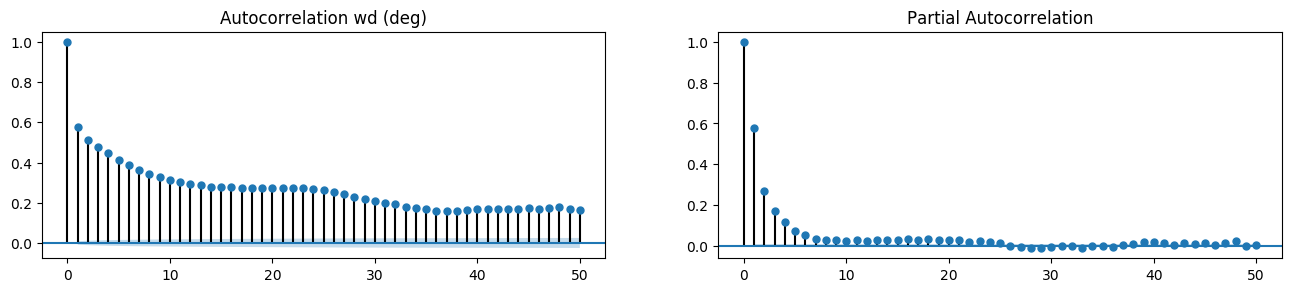

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_climate_vis["wd (deg)"].tolist(), lags=50, ax=axes[0], title='Autocorrelation wd (deg)',)
plot_pacf(train_climate_vis["wd (deg)"].tolist(), lags=50, ax=axes[1])

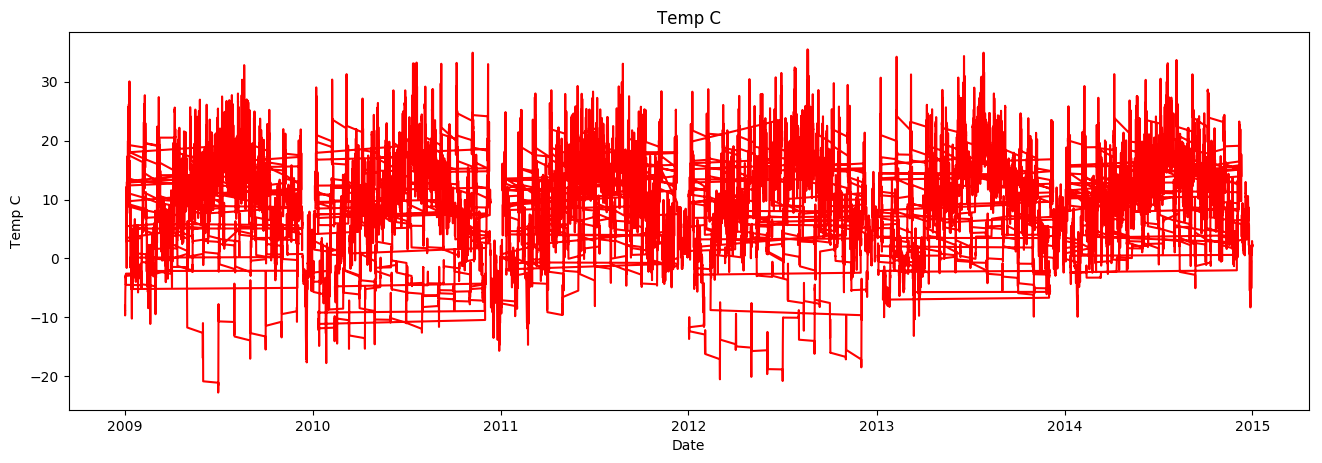

In [18]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Temp C', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_df(train_climate_vis, x=train_climate_vis['Date Time'], y= train_climate_vits['T (degC)'], title='Temp C')   

In [19]:
# # here data time is date time


train_climate_vis.dtypes

Date Time          datetime64[ns]
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
year                        int64
month                       int64
dtype: object

In [9]:
#The dataset shows an increasing trend and possibly some seasonal components.
# 1.idetifying the patters presented by the sequenec of observation (identifing the pattersn to know how our buisnees iteract with time)
# 2. forecasting or predicting

In [15]:
# # here data time is date time


train_climate_vis.dtypes

Date Time          datetime64[ns]
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
dtype: object

In [16]:
# Prepare data
train_climate_vis['year'] = [d.year for d in train_climate_vis['Date Time']]

In [36]:
train_climate_vis['month'] = [d.month for d in train_climate_vis['Date Time']]

In [37]:
years = train_climate_vis['year'].unique()

In [38]:
train_climate_vis.dtypes

Date Time          datetime64[ns]
p (mbar)                  float64
T (degC)                  float64
Tpot (K)                  float64
Tdew (degC)               float64
rh (%)                    float64
VPmax (mbar)              float64
VPact (mbar)              float64
VPdef (mbar)              float64
sh (g/kg)                 float64
H2OC (mmol/mol)           float64
rho (g/m**3)              float64
wv (m/s)                  float64
max. wv (m/s)             float64
wd (deg)                  float64
year                        int64
month                       int64
dtype: object

In [43]:
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [44]:
years[1]

2010

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


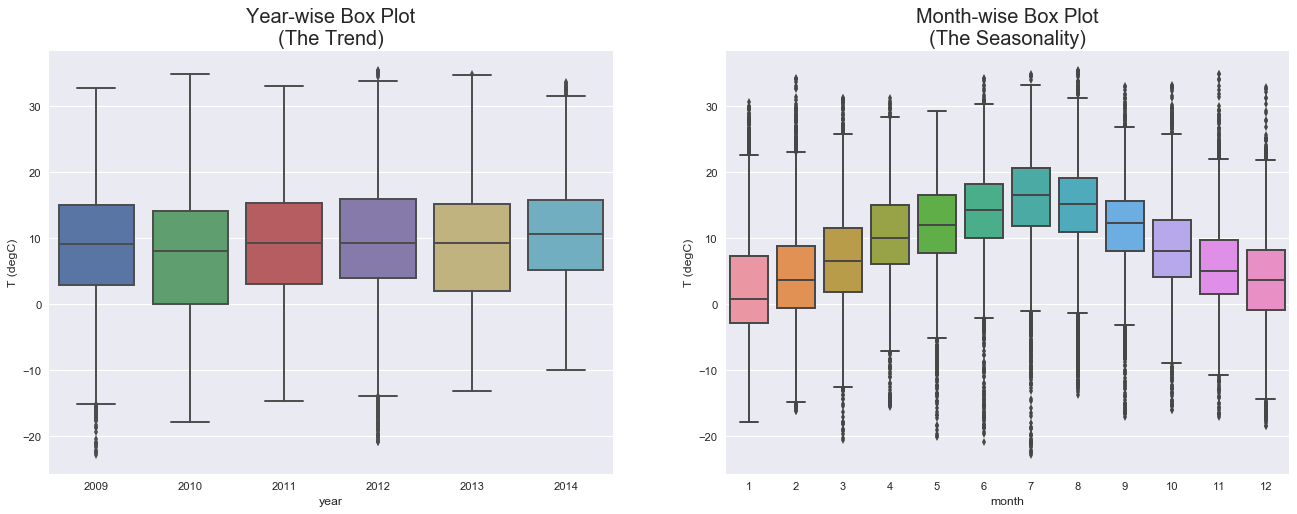

In [41]:

import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='T (degC)', data=train_climate_vis, ax=axes[0])
sns.boxplot(x='month', y='T (degC)', data= train_climate_vis)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [46]:
train_climate_vis.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),year,month,time_hour
52561,2014-12-31 19:00:00,1006.20,2.27,274.94,1.96,97.8,7.19,7.04,0.16,4.36,6.99,1269.29,0.48,1.28,120.3,2014,12,19
52562,2014-12-31 20:00:00,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3,2014,12,20
52563,2014-12-31 21:00:00,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3,2014,12,21
52564,2014-12-31 22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6,2014,12,22
52565,2014-12-31 23:00:00,1007.11,2.18,274.78,2.01,98.8,7.15,7.06,0.09,4.37,7.01,1270.82,0.35,0.86,140.8,2014,12,23


In [13]:
# find the batch size
# find the validation set lenght

52566%23



11

In [14]:
train_climate.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52561,31.12.2014 19:00:00,1006.20,2.27,274.94,1.96,97.8,7.19,7.04,0.16,4.36,6.99,1269.29,0.48,1.28,120.3
52562,31.12.2014 20:00:00,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3
52563,31.12.2014 21:00:00,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3
52564,31.12.2014 22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6
52565,31.12.2014 23:00:00,1007.11,2.18,274.78,2.01,98.8,7.15,7.06,0.09,4.37,7.01,1270.82,0.35,0.86,140.8


In [5]:
train_climate.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [16]:
round(len(train_climate)*0.33)

17347

In [17]:
def train_valid_length(train_set, batch_size, valid_percent):
    length = len(train_set) - round(len(train_set)*valid_percent)
    train_len = []
    for x in range(length-100, length):
        modulo = x%batch_size
        if modulo ==0:
            train_len.append(x)
    train_length = max(train_len)
    valid_length = len(train_set) - train_length
    return(train_length, valid_length )


In [18]:
train_valid_length(train_climate, batch_size =64, valid_percent = 0.33)

(35200, 17366)

In [19]:
train_data = train_climate[0:35200]
valid_data = train_climate[35201:]

In [20]:
len(train_data)

35200

In [21]:
train_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [22]:
valid_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
35201,06.01.2013 19:00:00,997.49,7.18,280.54,6.28,94.0,10.15,9.54,0.61,5.97,9.57,1235.03,2.53,3.94,265.2
35202,06.01.2013 20:00:00,997.80,7.14,280.48,6.33,94.6,10.12,9.58,0.55,5.99,9.60,1235.58,2.60,4.53,264.6
35203,06.01.2013 21:00:00,998.19,7.06,280.37,6.36,95.3,10.07,9.60,0.47,6.00,9.61,1236.41,2.09,4.61,258.2
35204,06.01.2013 22:00:00,998.40,7.06,280.35,5.96,92.7,10.07,9.33,0.74,5.84,9.35,1236.80,2.77,5.05,250.7
35205,06.01.2013 23:00:00,998.70,6.79,280.05,6.05,95.0,9.88,9.39,0.49,5.87,9.40,1238.33,1.77,3.48,266.5


In [43]:
from pandas import concat
def create_data_structure(data,n_x =1, n_y=1, dropnan=True):
    no_features = data.shape[1]
    train = list()
    features = list()
    # input sequence X(t-24,t-23 ... t-1) , now is t
    for i in range(n_x,0,-1):
        train.append(data.shift(i))
        features +=[(data.columns[j]+ ", v(t-{})".format(i)) for j in range(15)]
    # predict sequence Y(t, t+1, t+2...t+24)
    for i in range(0, n_y):
        train.append(data['T (degC)'].shift(-i))
        features+=[data.columns[2]+ ", v(t+{})".format(i)]
    train= concat(train, axis =1)
    #train_data.dropna(inplace=True)
    train.dropna(inplace=True)
    train.columns = features
    return train

In [49]:
train = create_data_structure(train_climate,n_x =24, n_y=1, dropnan=True)

In [51]:
# we have 15 columns x 24 for each row for the train data = 360 columns
# we have 1 column for temp   for y -train

train.shape

(52542, 361)

In [53]:
train

,"Date Time, v(t-24)","p (mbar), v(t-24)","T (degC), v(t-24)","Tpot (K), v(t-24)","Tdew (degC), v(t-24)","rh (%), v(t-24)","VPmax (mbar), v(t-24)","VPact (mbar), v(t-24)","VPdef (mbar), v(t-24)","sh (g/kg), v(t-24)",...,"VPmax (mbar), v(t-1)","VPact (mbar), v(t-1)","VPdef (mbar), v(t-1)","sh (g/kg), v(t-1)","H2OC (mmol/mol), v(t-1)","rho (g/m**3), v(t-1)","wv (m/s), v(t-1)","max. wv (m/s), v(t-1)","wd (deg), v(t-1)","T (degC), v(t+0)"
24,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,...,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00,-4.44
25,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,...,4.39,4.15,0.25,2.58,4.15,1293.47,0.28,1.00,148.10,-4.29
26,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,...,4.44,4.20,0.24,2.62,4.20,1292.22,0.49,0.88,209.80,-4.45
27,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,...,4.39,4.16,0.23,2.59,4.16,1292.69,0.65,1.00,203.30,-4.58
28,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,...,4.34,4.14,0.21,2.58,4.14,1292.83,0.77,1.38,190.20,-4.96
29,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,...,4.22,4.05,0.17,2.53,4.06,1294.44,0.79,1.25,22.22,-4.43
30,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,...,4.39,4.23,0.17,2.64,4.23,1291.66,0.81,2.13,40.88,-4.28
31,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,...,4.44,4.24,0.20,2.65,4.25,1291.15,0.53,1.13,156.40,-4.33
32,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,...,4.43,4.20,0.23,2.62,4.20,1291.44,1.64,2.38,178.70,-4.13
33,01.01.2009 10:00:00,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,...,4.49,4.22,0.28,2.63,4.22,1290.68,1.32,1.88,184.50,-3.93


In [54]:
train_climate.shape

(52566, 15)

In [26]:
train_climate.loc[train_climate['Date Time'] == '02.01.2009 01:00:00']

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
24,02.01.2009 01:00:00,999.34,-4.44,268.77,-5.19,94.4,4.39,4.15,0.25,2.58,4.15,1293.47,0.28,1.0,148.1
